In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn

# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, Input, MaxPooling1D, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_label = pd.read_excel("dataset_FINAL_afterPreprocessing.xlsx")
df_label = df_label['LabelFinal']

In [3]:
#SIMILARITY TOP AND CORPUS IN SCENARIO IV
    #Corpus: Tweet and Tweet + Berita
    #Top: 1, 5, 10
    #Continue with similarity top 15 and 20 and Tweet + Berita Corpus only
df_tfidf = pd.read_csv("fe_TFIDF_df_top1_tweet.csv")
df_tfidf.drop('Unnamed: 0', axis=1, inplace=True)
df_tfidf

,aamiin,abai,abang,abdi,abdul,abis,abu,abu waras,abur,abuse,...,zhico,zina,zoelfick,zon,zrn,zulfiarrahman,zulkiflilubis,zumhana,zusen,zusen tahan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = pd.read_excel("dataset_FINAL_afterPreprocessing.xlsx")
vectorizer = TfidfVectorizer(ngram_range = (1,2), max_features=10000)
vectorizer = vectorizer.fit(df['Text'])

tf_len = len(vectorizer.vocabulary_)

In [22]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_tfidf, df_label, test_size=0.1)

In [23]:
train_x = np.array(train_x).reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = np.array(test_x).reshape(test_x.shape[0], test_x.shape[1], 1)

In [24]:
model = Sequential()
model.add(Input(shape=(tf_len, 1)))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(filters=50, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=15, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
713/713 [==============================] - 916s 1s/step - loss: 0.3746 - accuracy: 0.7858
Epoch 2/5
713/713 [==============================] - 902s 1s/step - loss: 0.3138 - accuracy: 0.8090
Epoch 3/5
713/713 [==============================] - 611s 857ms/step - loss: 0.2926 - accuracy: 0.8195
Epoch 4/5
713/713 [==============================] - 552s 773ms/step - loss: 0.2840 - accuracy: 0.8234
Epoch 5/5
713/713 [==============================] - 692s 971ms/step - loss: 0.2777 - accuracy: 0.8213


In [26]:
predictions = model.predict(test_x)

80/80 [==============================] - 16s 177ms/step


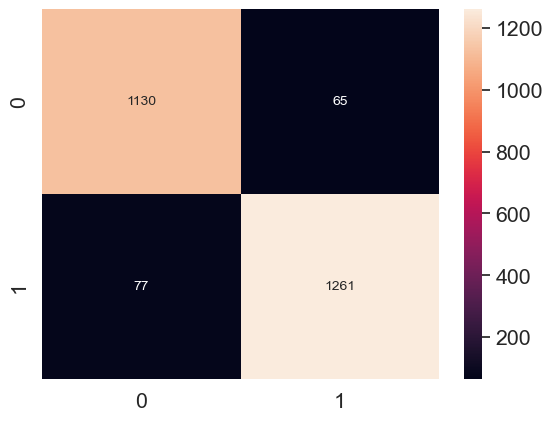

In [27]:
def plot_confussion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

plot_confussion_matrix(test_y, predictions.round())

In [28]:
print(classification_report(test_y, predictions.round(), digits=6))

              precision    recall  f1-score   support

           0   0.936205  0.945607  0.940883      1195
           1   0.950980  0.942451  0.946697      1338

    accuracy                       0.943940      2533
   macro avg   0.943593  0.944029  0.943790      2533
weighted avg   0.944010  0.943940  0.943954      2533

